#### Transfer Learning Experiment for new architecture of DWP:

### CIFAR100 -> Caltech101


### 1. Data For the Experiment

In [1]:
import torch
import torch.nn as nn
import torchvision
from torchvision.datasets.folder import default_loader


from PIL import Image
import tarfile
#import cv2
import torch
import os
from cifarnet import CIFARNet 
from sklearn.metrics import balanced_accuracy_score

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
from tqdm import notebook
from tqdm import tqdm_notebook

import utils
import json

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

 
import os
from torchvision.datasets import VisionDataset
from torchvision.datasets.folder import default_loader
from torchvision.datasets.utils import download_url
from torchvision.datasets.utils import extract_archive

from PIL import Image
from sklearn.linear_model import LogisticRegression

import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets

from sklearn.metrics import balanced_accuracy_score
from tqdm import notebook

import warnings
warnings.filterwarnings('ignore')

from pathlib import Path

import sklearn

from tqdm import tqdm_notebook

import os.path
import glob
import sys

from torchvision.datasets.utils import check_integrity
 
from torch.optim.lr_scheduler import LambdaLR

%matplotlib inline

from collections import OrderedDict
from collections import defaultdict

import pickle

from functools import partial

from IPython.display import clear_output
import time
from copy import deepcopy

In [3]:
torch.cuda.is_available()

False

#### Data Preparing on Colab

In [4]:
tar = tarfile.open("/content/drive/MyDrive/101_ObjectCategories.tar.gz") # images
tar.extractall("caltech_dataset_resized") 
tar.close()

In [6]:
labels = os.listdir('/content/caltech_dataset_resized/101_ObjectCategories')

for label in tqdm_notebook(labels, leave=True):   

    images = os.listdir(f'/content/caltech_dataset_resized/101_ObjectCategories/{label}')

    for image in tqdm_notebook(images, leave=False, desc=label):

        if not("tmp" in str(image) and ".ipynb_checkpoints" in str(image)):
          
          im = Image.open(f'/content/caltech_dataset_resized/101_ObjectCategories/{label}/{image}')
          
          im = im.convert("RGB")
          im = cv2.resize(np.array(im), (32,32), interpolation=cv2.INTER_AREA)
          
          im = plt.imsave(f'/content/caltech_dataset_resized/101_ObjectCategories/{label}/{image}', im)

  0%|          | 0/102 [00:00<?, ?it/s]

kangaroo:   0%|          | 0/86 [00:00<?, ?it/s]

rooster:   0%|          | 0/49 [00:00<?, ?it/s]

crab:   0%|          | 0/73 [00:00<?, ?it/s]

stop_sign:   0%|          | 0/64 [00:00<?, ?it/s]

pizza:   0%|          | 0/53 [00:00<?, ?it/s]

crayfish:   0%|          | 0/70 [00:00<?, ?it/s]

cellphone:   0%|          | 0/59 [00:00<?, ?it/s]

hedgehog:   0%|          | 0/54 [00:00<?, ?it/s]

ant:   0%|          | 0/42 [00:00<?, ?it/s]

windsor_chair:   0%|          | 0/56 [00:00<?, ?it/s]

brain:   0%|          | 0/98 [00:00<?, ?it/s]

crocodile:   0%|          | 0/50 [00:00<?, ?it/s]

water_lilly:   0%|          | 0/37 [00:00<?, ?it/s]

lobster:   0%|          | 0/41 [00:00<?, ?it/s]

Leopards:   0%|          | 0/200 [00:00<?, ?it/s]

Faces_easy:   0%|          | 0/435 [00:00<?, ?it/s]

cougar_body:   0%|          | 0/47 [00:00<?, ?it/s]

barrel:   0%|          | 0/47 [00:00<?, ?it/s]

flamingo_head:   0%|          | 0/45 [00:00<?, ?it/s]

flamingo:   0%|          | 0/67 [00:00<?, ?it/s]

dalmatian:   0%|          | 0/67 [00:00<?, ?it/s]

pyramid:   0%|          | 0/57 [00:00<?, ?it/s]

lamp:   0%|          | 0/61 [00:00<?, ?it/s]

pigeon:   0%|          | 0/45 [00:00<?, ?it/s]

brontosaurus:   0%|          | 0/43 [00:00<?, ?it/s]

helicopter:   0%|          | 0/88 [00:00<?, ?it/s]

rhino:   0%|          | 0/59 [00:00<?, ?it/s]

dolphin:   0%|          | 0/65 [00:00<?, ?it/s]

soccer_ball:   0%|          | 0/64 [00:00<?, ?it/s]

hawksbill:   0%|          | 0/100 [00:00<?, ?it/s]

crocodile_head:   0%|          | 0/51 [00:00<?, ?it/s]

starfish:   0%|          | 0/86 [00:00<?, ?it/s]

dragonfly:   0%|          | 0/68 [00:00<?, ?it/s]

BACKGROUND_Google:   0%|          | 0/467 [00:00<?, ?it/s]

panda:   0%|          | 0/38 [00:00<?, ?it/s]

anchor:   0%|          | 0/42 [00:00<?, ?it/s]

chair:   0%|          | 0/62 [00:00<?, ?it/s]

stegosaurus:   0%|          | 0/59 [00:00<?, ?it/s]

cup:   0%|          | 0/57 [00:00<?, ?it/s]

yin_yang:   0%|          | 0/60 [00:00<?, ?it/s]

trilobite:   0%|          | 0/86 [00:00<?, ?it/s]

sea_horse:   0%|          | 0/57 [00:00<?, ?it/s]

ferry:   0%|          | 0/67 [00:00<?, ?it/s]

buddha:   0%|          | 0/85 [00:00<?, ?it/s]

butterfly:   0%|          | 0/91 [00:00<?, ?it/s]

umbrella:   0%|          | 0/75 [00:00<?, ?it/s]

bass:   0%|          | 0/54 [00:00<?, ?it/s]

elephant:   0%|          | 0/64 [00:00<?, ?it/s]

scissors:   0%|          | 0/39 [00:00<?, ?it/s]

ewer:   0%|          | 0/85 [00:00<?, ?it/s]

llama:   0%|          | 0/78 [00:00<?, ?it/s]

schooner:   0%|          | 0/63 [00:00<?, ?it/s]

watch:   0%|          | 0/239 [00:00<?, ?it/s]

menorah:   0%|          | 0/87 [00:00<?, ?it/s]

airplanes:   0%|          | 0/800 [00:00<?, ?it/s]

nautilus:   0%|          | 0/55 [00:00<?, ?it/s]

minaret:   0%|          | 0/76 [00:00<?, ?it/s]

pagoda:   0%|          | 0/47 [00:00<?, ?it/s]

accordion:   0%|          | 0/55 [00:00<?, ?it/s]

saxophone:   0%|          | 0/40 [00:00<?, ?it/s]

stapler:   0%|          | 0/45 [00:00<?, ?it/s]

chandelier:   0%|          | 0/107 [00:00<?, ?it/s]

mandolin:   0%|          | 0/43 [00:00<?, ?it/s]

wild_cat:   0%|          | 0/34 [00:00<?, ?it/s]

sunflower:   0%|          | 0/85 [00:00<?, ?it/s]

inline_skate:   0%|          | 0/31 [00:00<?, ?it/s]

car_side:   0%|          | 0/123 [00:00<?, ?it/s]

bonsai:   0%|          | 0/128 [00:00<?, ?it/s]

Faces:   0%|          | 0/435 [00:00<?, ?it/s]

snoopy:   0%|          | 0/35 [00:00<?, ?it/s]

Motorbikes:   0%|          | 0/798 [00:00<?, ?it/s]

tick:   0%|          | 0/49 [00:00<?, ?it/s]

camera:   0%|          | 0/50 [00:00<?, ?it/s]

scorpion:   0%|          | 0/84 [00:00<?, ?it/s]

binocular:   0%|          | 0/33 [00:00<?, ?it/s]

beaver:   0%|          | 0/46 [00:00<?, ?it/s]

emu:   0%|          | 0/53 [00:00<?, ?it/s]

okapi:   0%|          | 0/39 [00:00<?, ?it/s]

wrench:   0%|          | 0/39 [00:00<?, ?it/s]

ketch:   0%|          | 0/114 [00:00<?, ?it/s]

gramophone:   0%|          | 0/51 [00:00<?, ?it/s]

electric_guitar:   0%|          | 0/75 [00:00<?, ?it/s]

garfield:   0%|          | 0/34 [00:00<?, ?it/s]

mayfly:   0%|          | 0/40 [00:00<?, ?it/s]

metronome:   0%|          | 0/32 [00:00<?, ?it/s]

lotus:   0%|          | 0/66 [00:00<?, ?it/s]

ceiling_fan:   0%|          | 0/47 [00:00<?, ?it/s]

laptop:   0%|          | 0/81 [00:00<?, ?it/s]

octopus:   0%|          | 0/35 [00:00<?, ?it/s]

ibis:   0%|          | 0/80 [00:00<?, ?it/s]

platypus:   0%|          | 0/34 [00:00<?, ?it/s]

wheelchair:   0%|          | 0/59 [00:00<?, ?it/s]

revolver:   0%|          | 0/82 [00:00<?, ?it/s]

strawberry:   0%|          | 0/35 [00:00<?, ?it/s]

joshua_tree:   0%|          | 0/64 [00:00<?, ?it/s]

euphonium:   0%|          | 0/64 [00:00<?, ?it/s]

cannon:   0%|          | 0/43 [00:00<?, ?it/s]

dollar_bill:   0%|          | 0/52 [00:00<?, ?it/s]

gerenuk:   0%|          | 0/34 [00:00<?, ?it/s]

grand_piano:   0%|          | 0/99 [00:00<?, ?it/s]

cougar_face:   0%|          | 0/69 [00:00<?, ?it/s]

headphone:   0%|          | 0/42 [00:00<?, ?it/s]

In [5]:
!rm -r /content/caltech_dataset_resized/101_ObjectCategories/BACKGROUND_Google/.ipynb_checkpoints

### 2. Preparing data for experiment by loaders

In [4]:
class Caltech_101_(torchvision.datasets.VisionDataset):

  def __init__(self, root,
               train = True ,
               samples_per_cls =25,
               class_type = 'variant',
               transform = None,
               target_transform = None,
               download = False
               ):
    """
    root.            :
    train            :
    class_type.      :
    transform        :
    target_transform :
    download         : 

    """
    super(Caltech_101_,self).__init__(root, transform = transform, target_transform=target_transform)

    self.root = root
    self.train = train
    self.transform = transform
    self.samples_per_cls = samples_per_cls

    self.classes = self.get_classes()
    self.image_ids, self.targets, self.label_to_target, self.target_to_lable = self.find_classes()
    self.samples = (self.image_ids, self.targets)
    self.dataset = self.split_kolesov()
    
    
  
  def get_classes(self):
    return os.listdir(self.root)



  def find_classes(self):

    image_ids = []
    targets = []
    label_to_target = {}
    target_to_label = {}
  
    target_counter = 0
    
    #print(os.listdir(self.root))
    for label in os.listdir(self.root):
        if not(".DS" in label): 
          label_to_target[label] = target_counter
          target_to_label[target_counter] = label
          #print(label)
          for image in os.listdir(self.root + "/{}".format(label)):
            if not('.DS_' in  image):

              image_ids.append(  image )
              targets.append(target_counter)

          target_counter += 1

    return np.array(image_ids), np.array(targets) , label_to_target, target_to_label




  def __len__(self):
    return len(self.targets)



  def split_kolesov(self):

    unique, counts = np.unique(self.targets, return_counts=True)
    assert self.samples_per_cls < min(counts) 

    if self.train == True:

      train_images_ids = []
      train_targets = []
      
       
      for label in self.classes:
        
        if not('.DS_'  in label):
            idxs = np.where( np.array(self.targets) == self.label_to_target[label])[0]
            mixed = np.random.permutation(self.image_ids[idxs])
            train_images_ids.extend(  mixed[: self.samples_per_cls] ) 
            train_targets.extend([label]*(self.samples_per_cls))
      
      dataset = (train_images_ids, train_targets)
       

    else:

      test_image_ids = []
      test_targets    = []

      
      for label in self.classes:
        
        if not('.DS_' in label):
            idxs = np.where( np.array(self.targets) == self.label_to_target[label])[0]
            mixed = np.random.permutation(self.image_ids[idxs])
            test_image_ids.extend(  mixed[ self.samples_per_cls : ] ) 
            test_targets.extend([label]*( len(self.image_ids[idxs]) - self.samples_per_cls)) 

      dataset = (test_image_ids, test_targets)    

    return dataset

  def __getitem__(self, index):

        path, target = self.image_ids[index], self.targets[index]
        label = self.target_to_lable[target]
        
    
        sample = default_loader("resized_caltech_101/{}/{}".format(label,path))
         
        if self.transform is not None:
            sample = self.transform(sample)
            
        if self.target_transform is not None:
            target = self.target_transform(target)
        return sample, target






In [30]:
data_transforms = {
    'train': utils.transform_train(resize_size=32, crop_size=32),
    'val': utils.transform_test(resize_size=32, crop_size=32),
}

In [31]:
train_dataset = Caltech_101_("resized_caltech_101",
               train = True ,
               samples_per_cls =25,
               class_type = 'variant',
               transform = data_transforms['train'],
               target_transform = None,
               download = False
               )

val_dataset = Caltech_101_("resized_caltech_101",
               train = False ,
               samples_per_cls =25,
               class_type = 'variant',
               transform = data_transforms['val'],
               target_transform = None,
               download = False
               )

In [32]:
dsets = {"train":  train_dataset,
        "val_norm":val_dataset}


batch_size = {"train": 64, "test": 100}

### Launch

In [33]:
N_LAUNCHES = 1

num_epochs = 200
epoch_unfreezing = 10
SAMPLING_RATE = 1.00

save_dir = 'results'

In [34]:
np.random.seed(0)
seeds = np.random.randint(2**31, size=N_LAUNCHES+100, dtype=np.uint32)
seeds = np.random.choice(seeds, size=N_LAUNCHES, replace=False)
np.random.seed()

seeds

array([1729147268], dtype=uint32)

In [35]:
device = 'cpu'

In [28]:
EPOCHS = [1,2,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120,125,130,135,140,145,150,155,160,165,170,175,180,185,190,191,192,193,194,195,196,197,198,199]

Epoch 174 of 200 took 234.417s
  validation accuracy: 			58.12 %


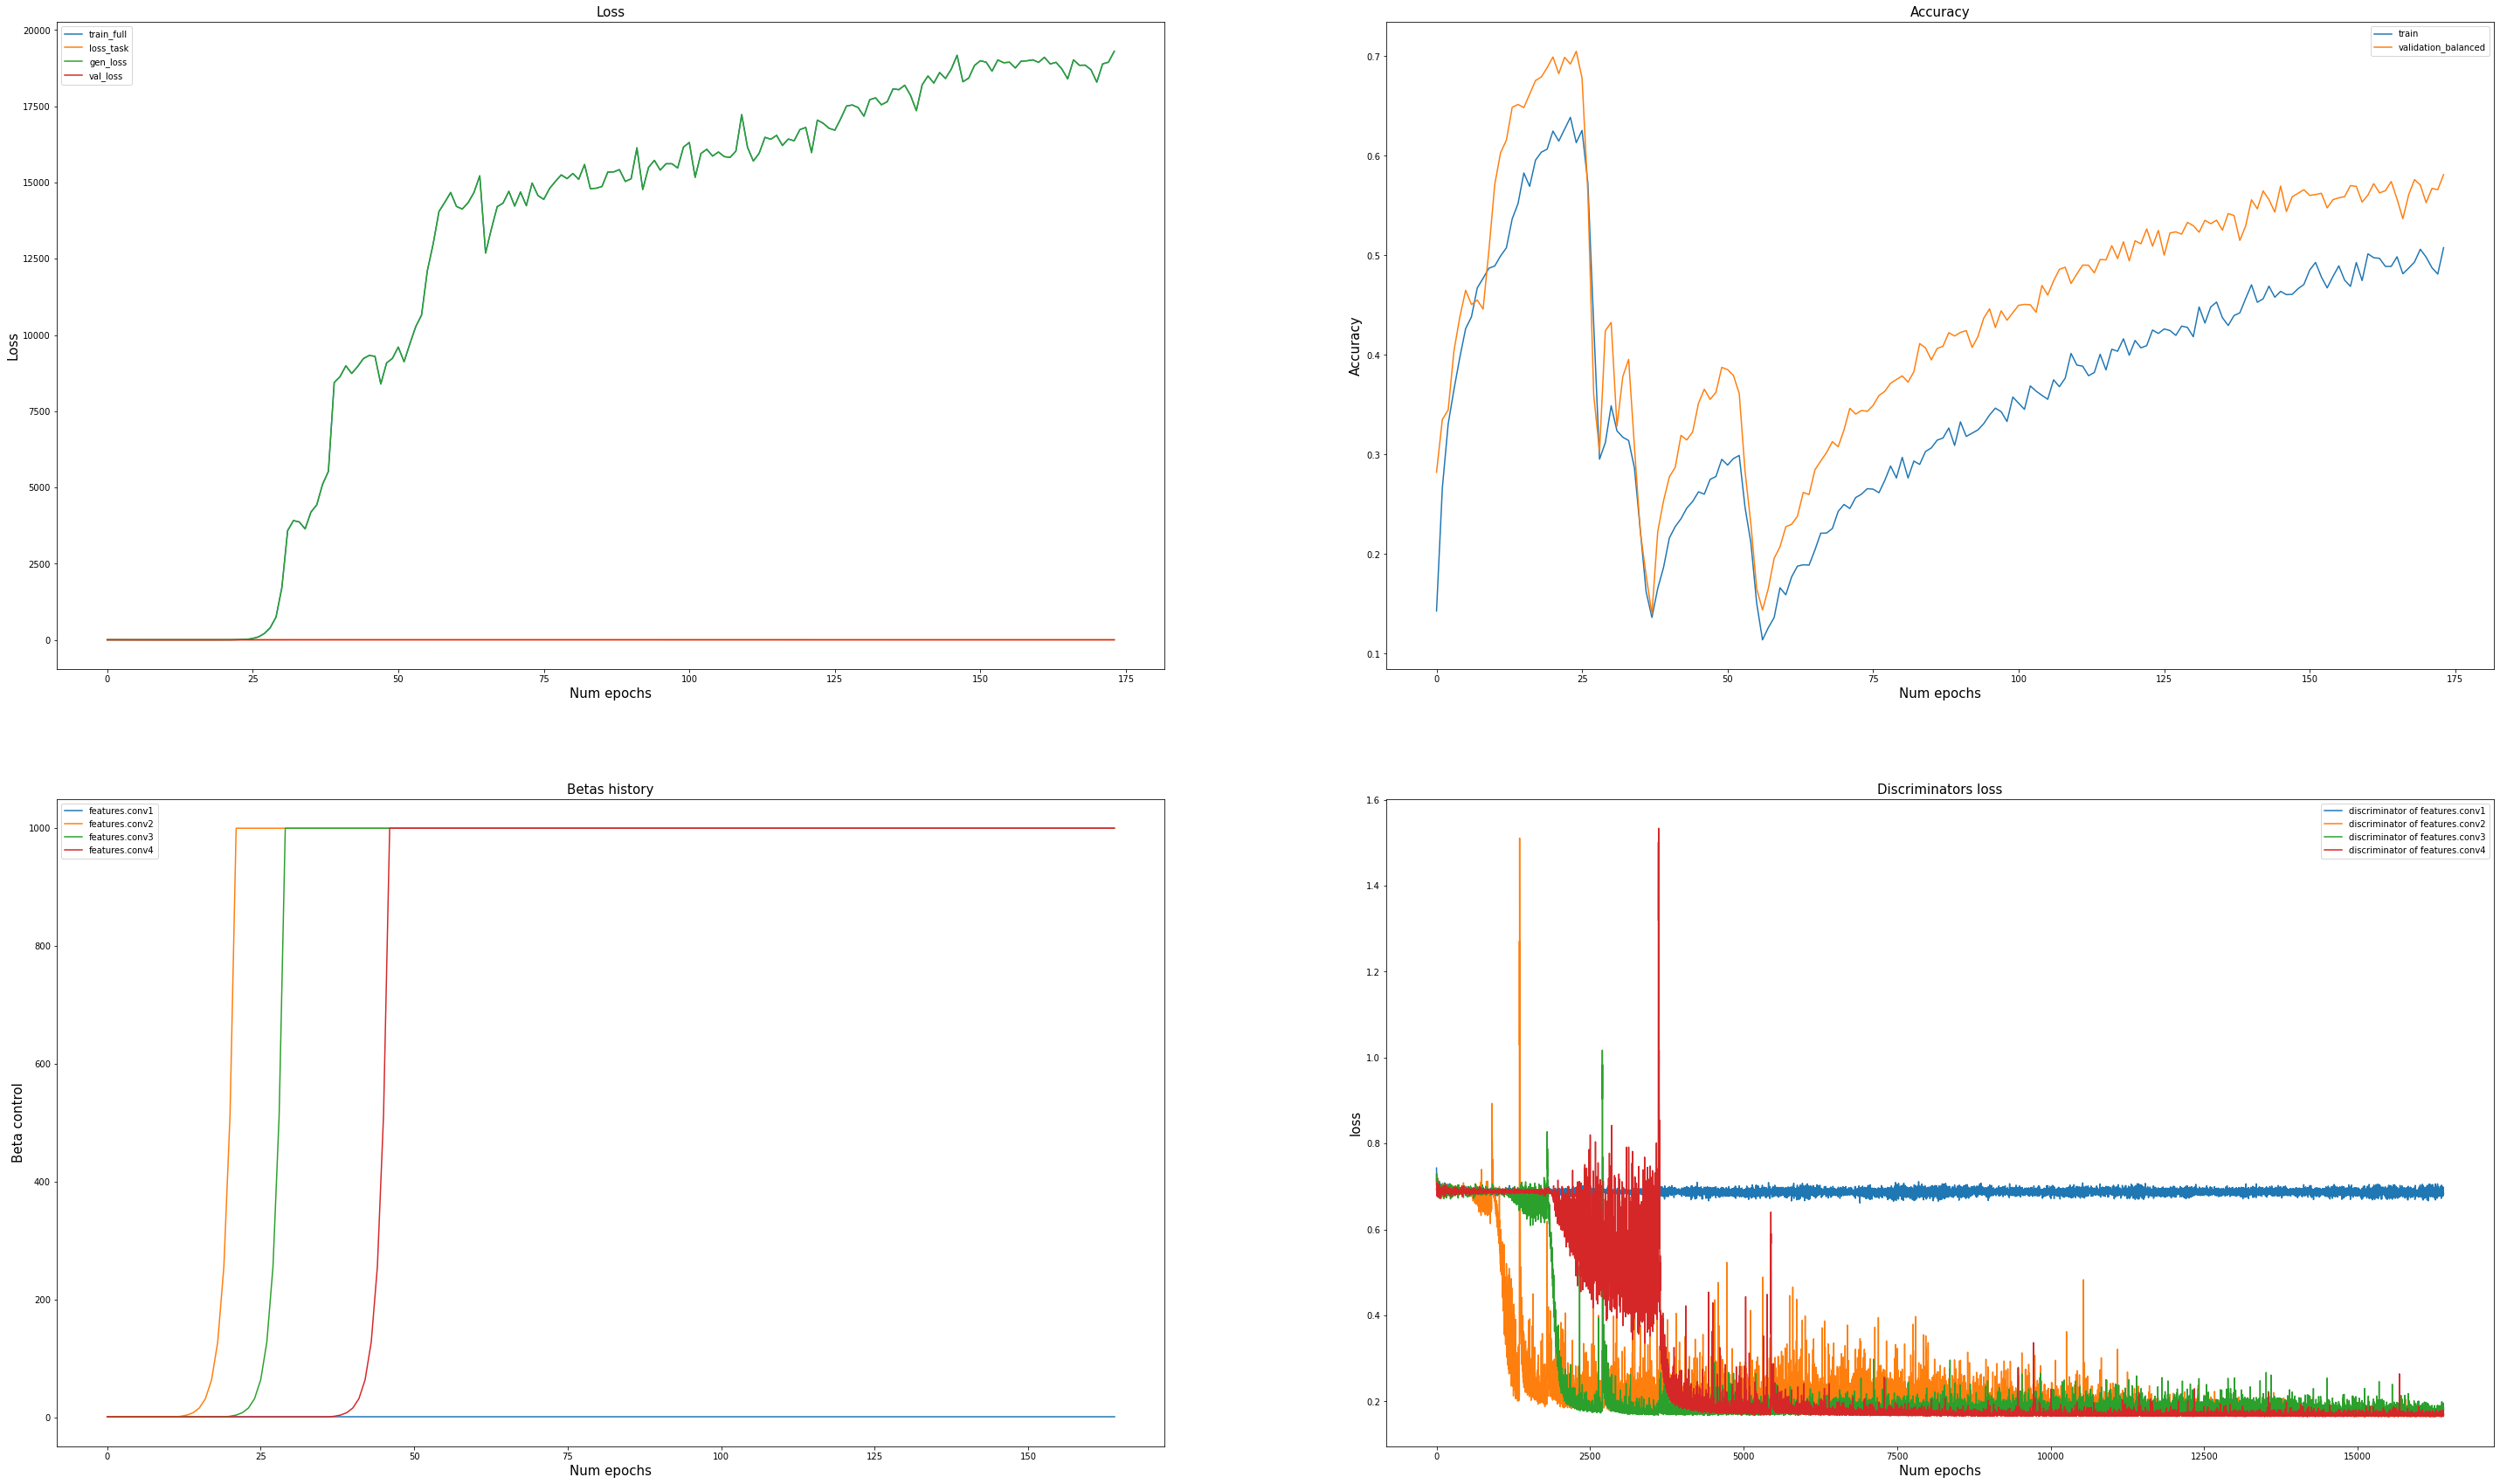

generative_loss = 20935.58203125
generative_loss = 18868.19921875
generative_loss = 16755.12890625
generative_loss = 15676.845703125
generative_loss = 17442.642578125
generative_loss = 18693.02734375
generative_loss = 18449.19921875
generative_loss = 17554.8515625
generative_loss = 20105.34765625


In [ ]:
for n_launch in range(1, N_LAUNCHES+1):
    print('\n')
    print('='*30)
    print('*'*30)
    print('='*30)
    print('\n')
    
    seed = seeds[n_launch-1]
    print(f'Launch {n_launch}, seed: {seed}')
    

    train_idxs = utils.RandomUnderSample(dsets['train'].targets, sampling_rate=SAMPLING_RATE, random_state=seed)

    dset_loaders = {}
    dset_loaders['train'] =  torch.utils.data.DataLoader(dsets['train'], batch_size=batch_size['train'], sampler = torch.utils.data.SubsetRandomSampler(train_idxs))

    dset_loaders["val_norm"] = torch.utils.data.DataLoader(dsets["val_norm"], batch_size=batch_size['test'],shuffle=False)

    dset_classes = range(len(dsets['train'].classes)) # range(0,120)
    dset_sizes = {x: len(dsets[x]) for x in ['train', 'val_norm']}
    print(f'Sizes: {dset_sizes}')
    print(f'Rate: {SAMPLING_RATE}, Train size: {len(train_idxs)}')
    
    """
    #=============================
    #=============================
    #=============================
    
    # DELTA

    model_target =   CIFARNet()
    model_target = model_target.to(device)

    model_source = torch.load("cifarnet100.model",map_location=torch.device('cpu'))
    model_source = model_source.to(device)
    model_source.requires_grad_(False)
    model_source.eval()

    # collect weights from pre-trained model on source
    model_source_weights = {}
    for name, param in model_source.named_parameters():
      model_source_weights[name] = param.detach().data.clone().cpu()

    
    # new model for training on target database
    num_classes =  len(dset_classes)
    
    model_target.features.load_state_dict(deepcopy(model_source.features.state_dict()))
    model_target.classifier.load_state_dict(deepcopy(model_source.classifier.state_dict()))
    
    model_target.train(True)
    model_target = model_target.to(device)

    alpha =0.0005 # hyperparameter for optimization for feature loss
    beta = 0.001 # hyperparameter for optimization for l2-regularizing
    hook_layers = ["features.conv1","features.conv2","features.conv3","features.conv4"]
    channel_wei = "channel_wei.json"


    criterion = {"classifier":nn.CrossEntropyLoss()}

    model_target.classifier.fc2 = torch.nn.Linear(512, len(dset_classes)).to(device)
    model_target.classifier.fc2.weight.data.normal_(0,0.01)
    model_target.classifier.fc2.bias.data.fill_(0.0)

    optimizer_dict =[{"params":filter(lambda p: p.requires_grad,model_target.features.parameters()), "lr":1e-3},\
                     {"params":filter(lambda p: p.requires_grad,model_target.classifier.parameters()), "lr":1e-1}]

    
    # there is additional loss as l2 regularization that is why weight_decay = 0 here
    optimizer = torch.optim.SGD(optimizer_dict, weight_decay=0, momentum = 0.9)
      

    # set weights for regularization for each filters of 4 layers
    channel_weights = []
    if  channel_wei:
        for js in json.load(open(channel_wei)):
            js = np.array(js)
            js = (js - np.mean(js)) / np.std(js)
            cw = torch.from_numpy(js).float().to(device)
          
            cw = torch.nn.functional.softmax(cw / 5).detach()
            channel_weights.append(cw)  

    #hooks 
    layer_outputs_source = []
    layer_outputs_target = []

    def for_hook_source(module, input, output):
      layer_outputs_source.append(output)

    def for_hook_target(module,input, output):
      layer_outputs_target.append(output)


    def register_hook(model,func):
      for name, module in model.named_modules():
        if name in hook_layers:
          module.register_forward_hook(func)

    register_hook(model_source, for_hook_source)
    register_hook(model_target, for_hook_target)

    fc_name = 'classifier'
    

    print('-'*10)
    print('Train DELTA')
    print('-'*10, end='\n')

        
    history = defaultdict(lambda : defaultdict(list))

    for epoch in tqdm_notebook(range(num_epochs)):
      
      # model_target

      model_target.train(True)
      model_target.requires_grad_(True)

      model_source.train(False)
      model_source.requires_grad_(False)

      train_loss = 0.
      train_task = 0.
      train_fea = 0.
      train_reg = 0.

      train_corrects = 0.

      val_corrects = 0.
      val_loss = 0.
      
      # for balanced_accuracy_score
      val_targets = []
      val_logits = []

      optimizer.param_groups[1]['lr'] = utils.learning_rate_schedule(0.1, epoch+1, num_epochs)
      
       
      for batch_x, batch_y in tqdm_notebook(dset_loaders['train']):
        
         
        optimizer.zero_grad()
        outputs = model_target(batch_x.to(device))
        

        

        
        loss_main = criterion['classifier'](outputs, batch_y.long().to(device))
 
        loss_feature = utils.reg_att_fea_map(batch_x.to(device),
                                              model_source,
                                              device,
                                              layer_outputs_source,
                                              layer_outputs_target,
                                              channel_weights) 

        
        loss_classifier = utils.reg_classifier(model_target, fc_name, device) # model on device

        loss = loss_main + alpha * loss_feature + beta * loss_classifier
         
        loss.backward()
        optimizer.step()
       
        # clear history
        layer_outputs_source.clear()
        layer_outputs_target.clear()
      
         

        indices = torch.argmax(outputs.detach(),1).cpu().numpy()
        train_corrects += np.mean(batch_y.numpy() == indices )
        train_loss += loss.detach().item()
        train_task += loss_main.detach().item()
        train_fea += alpha*loss_feature
        train_reg += beta*loss_classifier
      
      train_loss /= len(dset_loaders['train'])
      train_task /= len(dset_loaders['train'])
      train_fea /= len(dset_loaders['train'])
      train_reg /= len(dset_loaders['train'])

      train_corrects /= len(dset_loaders['train'])
      history['train']['loss'].append(train_loss)
      history['train']['acc'].append(train_corrects)
      history['train']['loss_task'].append(train_task)
      history['train']['loss_fea'].append(train_fea)
      history['train']['loss_reg'].append(train_reg)
      print('train accuracy unbalanced :{} of epoch : {}'.format(train_corrects,epoch))

      
      if epoch in EPOCHS:
          model_target.eval()
          with torch.no_grad():
            for batch_x, batch_y in tqdm_notebook(dset_loaders['val_norm']):
              outputs = model_target(batch_x.to(device))
              indices = torch.argmax(outputs,1).detach().cpu().numpy()
              val_corrects += np.mean(batch_y.numpy() == indices)


              val_targets.extend([ x.item() for x in batch_y.cpu()])
              val_logits.extend(indices)

            layer_outputs_source.clear()
            layer_outputs_target.clear()
            val_corrects /= len(dset_loaders['val_norm'])
            history['val']['acc'].append(val_corrects)
            val_acc = balanced_accuracy_score(val_targets,  val_logits)
            history['val']['bal_acc'].append(val_acc)

            print('balanced validation accuracy {} of epoch : {}'.format(val_acc, epoch))


            utils.plot_delta_plots(model_source, model_target, history, epoch)
            clear_output()

    Path(f'{save_dir}/{n_launch}').mkdir(parents=True, exist_ok=True)

    torch.save(history['val']['bal_acc'], f'{save_dir}/{n_launch}/balanced_delta.pt')
    torch.save(history['val']['acc'], f'{save_dir}/{n_launch}/cum_delta.pt')
    torch.save(history['train']['loss_task'],f'{save_dir}/{n_launch}/loss_task.pt')
    torch.save(history['train']['loss_fea'],f'{save_dir}/{n_launch}/loss_fea.pt')
    torch.save(history['train']['loss_reg'],f'{save_dir}/{n_launch}/loss_reg.pt')
    torch.save(model_target, f'{save_dir}/{n_launch}/ResNet_delta.model')

    
    balanced_delta  = history['val']['bal_acc'] 

    # pull on cuda
    model_source.cpu()
    model_target.cpu()

    del loss
    del history
        
    
    # BSS
       

 

    model = CIFARNet()
    model_ = torch.load("cifarnet100.model",map_location=torch.device('cpu'))

    model_target.features.load_state_dict(deepcopy(model_source.features.state_dict()))

    model.features.load_state_dict(deepcopy(model_.features.state_dict()))
    model.classifier.load_state_dict(deepcopy(model_.classifier.state_dict()))

    model = model.to(device)
    model.train(True)

    criterion = {"classifier":nn.CrossEntropyLoss()}
    model.classifier.fc2 = torch.nn.Linear(512, len(dset_classes))
    model.classifier.fc2.weight.data.normal_(0,0.01)
    model.classifier.fc2.bias.data.fill_(0.0)

    optimizer_dict =[{"params":filter(lambda p: p.requires_grad,model.features.parameters()), "lr":1e-3},\
                     {"params":filter(lambda p: p.requires_grad,model.classifier.parameters()), "lr":1e-1}]
    optimizer = torch.optim.SGD(optimizer_dict, weight_decay=1e-4, momentum = 0.9)

    
    
    print('-'*10)
    print('Train BSS')
    print('-'*10, end='\n')

    acc_train_sum = []
    acc_train_balanced = []

    acc_val_sum = []
    val_acc_balanced = []

    for epoch in notebook.tqdm(range(num_epochs)):


        #until without scheduler
        #optimizer = ft_lr_scheduler(param_lr, optimizer, iter_num, iter=6000, new=0.1, init_lr=lr)

        optimizer.param_groups[1]['lr'] = utils.learning_rate_schedule(0.1, epoch+1, num_epochs)

        train_cross_loss = 0
        train_total_loss = 0
        train_acc = 0

        train_logits = []
        train_targets = []

        for batch_x,batch_y in dset_loaders['train']:

            model.train(True)
            optimizer.zero_grad()
             
            outC, BSS = model(batch_x.to(device))
             
            classifier_loss = criterion["classifier"](outC, batch_y.long().to(device))
            print(classifier_loss)
             

            total_loss = classifier_loss  + 0.001*BSS
             
            total_loss.backward()
            optimizer.step()

            train_cross_loss += classifier_loss.item()
            train_total_loss += total_loss.item()

            y_pred_train = outC.max(1)[1].detach().cpu().numpy()

            train_acc += np.mean(batch_y.numpy() == y_pred_train) 


            train_logits.extend(y_pred_train)
            train_targets.extend([ x.item() for x in batch_y.cpu()])

        acc_train_sum.append( train_acc/len(dset_loaders['train']) )
        bal_train_acc = balanced_accuracy_score(train_targets, train_logits)
        acc_train_balanced.append(bal_train_acc)


        print("train accuracy sum:")
        print(train_acc/len(dset_loaders['train']) )
        print("train accuracy balanced: ")
        print(bal_train_acc)


        massiv_logits = []
        massiv_true = []
        accur_val = 0

        with torch.no_grad():
            model.eval()
            for batch_x,batch_y in dset_loaders['val_norm'] :
                outC,_ = model(batch_x.to(device))
                y_pred = outC.max(1)[1].detach().cpu().numpy()

                accur_val +=  np.mean(batch_y.numpy() == y_pred) 

                massiv_logits.extend(y_pred)
                massiv_true.extend([ x.item() for x in batch_y.cpu()])

            acc_val_sum.append(accur_val/len(dset_loaders["val_norm"]))
            val_acc = balanced_accuracy_score(massiv_true, massiv_logits)
            val_acc_balanced.append(val_acc)

            print("valid accuracy unbalanced:")
            print(accur_val/len(dset_loaders["val_norm"]))
            print("validation  balanced accuracy :")
            print(val_acc)

    balanced_bss = val_acc_balanced
    cum_bss = acc_val_sum


    Path(f'{save_dir}/{n_launch}').mkdir(parents=True, exist_ok=True)

    torch.save(balanced_bss, f'{save_dir}/{n_launch}/balanced_bss.pt')
    torch.save(cum_bss, f'{save_dir}/{n_launch}/cum_bss.pt')
    torch.save(model, f'{save_dir}/{n_launch}/model_bss.model')
    
    del model
    del classifier_loss
    del total_loss
    
    
    
    #=============================
    #=============================
    #=============================
    
    # L2-SP
    
 
    model =  CIFARNet()
    model_ = torch.load("cifarnet100.model",map_location=torch.device('cpu'))

    model.features.load_state_dict(deepcopy(model_.features.state_dict()))
    model.classifier.load_state_dict(deepcopy(model_.classifier.state_dict()))
     
    model = model.to(device)
    model.train(True)

    criterion = {"classifier":nn.CrossEntropyLoss()}

    model.classifier.fc2 = torch.nn.Linear(512, len(dset_classes)).to(device)
    model.classifier.fc2.weight.data.normal_(0,0.01)
    model.classifier.fc2.bias.data.fill_(0.0)

    optimizer_dict =[{"params":filter(lambda p: p.requires_grad,model.features.parameters()), "lr":1e-3},\
                     {"params":filter(lambda p: p.requires_grad,model.classifier.parameters()), "lr":1e-1}]
    optimizer = torch.optim.SGD(optimizer_dict, weight_decay=1e-4, momentum = 0.9)

    alpha = 0.01
    beta = 0.001
 
    model_ = model_.to(device)
    pretrained_parameters = [param for param in model_.parameters()]
    
    print('-'*10)
    print('Train L2-SP')
    print('-'*10, end='\n')
    
    acc_train_sum = []
    acc_train_balanced = []

    acc_val_sum = []
    val_acc_balanced = []
    

    history = defaultdict(lambda : defaultdict(list))
    for epoch in notebook.tqdm(range(num_epochs)):


        #until without scheduler
        #optimizer = ft_lr_scheduler(param_lr, optimizer, iter_num, iter=6000, new=0.1, init_lr=lr)
        optimizer.param_groups[1]['lr'] = utils.learning_rate_schedule(0.1, epoch+1, num_epochs)

        train_cross_loss = 0
        train_total_loss = 0
        train_acc = 0

        train_logits = []
        train_targets = []

        for batch_x,batch_y in dset_loaders['train']:

            model.train(True)
            optimizer.zero_grad()
            outC = model(batch_x.to(device))
            classifier_loss = criterion["classifier"](outC, batch_y.long().to(device))

            reg_loss = 0
            params_index = -1
            for params in model.parameters():
                params_index += 1
                if params.size() == pretrained_parameters[params_index].size():
                    # parts that share the archetecture
                    delta_param = params - pretrained_parameters[params_index]
                    reg_loss += 0.5* alpha * delta_param.norm(2)**2
                else: 
                    #parts that differ
                    reg_loss += 0.5* beta * params.norm(2)**2

            total_loss = classifier_loss + reg_loss
            

            total_loss.backward()
            optimizer.step()

            train_cross_loss += classifier_loss.item()
            train_total_loss += total_loss.item()

            y_pred_train = outC.max(1)[1].detach().cpu().numpy()

            train_acc += np.mean(batch_y.numpy() == y_pred_train) 


            train_logits.extend(y_pred_train)
            train_targets.extend([ x.item() for x in batch_y.cpu()])
        

        train_cross_loss /= len(dset_loaders['train'])
        train_total_loss /= len(dset_loaders['train'])
        acc_train_sum.append( train_acc/len(dset_loaders['train']) )
        bal_train_acc = balanced_accuracy_score(train_targets, train_logits)
        acc_train_balanced.append(bal_train_acc)
        history['train']['loss_task'].append(train_cross_loss)
        history['train']['full_loss'].append(train_total_loss)
        history['train']['reg_loss'].append(train_total_loss - train_cross_loss)


        print("train accuracy sum:")
        print(train_acc/len(dset_loaders['train']) )
        print("train accuracy balanced: ")
        print(bal_train_acc)


        massiv_logits = []
        massiv_true = []
        accur_val = 0
        
        if epoch in EPOCHS:
            with torch.no_grad():
                model.eval()
                for batch_x,batch_y in dset_loaders['val_norm'] :
                    outC = model(batch_x.to(device))
                    y_pred = outC.max(1)[1].detach().cpu().numpy()

                    accur_val +=  np.mean(batch_y.numpy() == y_pred) 

                    massiv_logits.extend(y_pred)
                    massiv_true.extend([ x.item() for x in batch_y.cpu()])

                acc_val_sum.append(accur_val/len(dset_loaders["val_norm"]))
                val_acc = balanced_accuracy_score(massiv_true, massiv_logits)
                val_acc_balanced.append(val_acc)

                print("valid accuracy unbalanced:")
                print(accur_val/len(dset_loaders["val_norm"]))
                print("validation  balanced accuracy :")
                print(val_acc)
    
    
    balanced_L2SP = val_acc_balanced
    cum_L2SP = acc_val_sum
    
    torch.save(balanced_L2SP, f'{save_dir}/{n_launch}/balanced_L2SP.pt')
    torch.save(cum_L2SP, f'{save_dir}/{n_launch}/cum_L2SP.pt')
    torch.save(model, f'{save_dir}/{n_launch}/model_L2SP.model')
    torch.save(history['train']['reg_loss'],f'{save_dir}/{n_launch}/reg_loss_L2SP.model')
    torch.save(history['train']['loss_task'],f'{save_dir}/{n_launch}/loss_task_L2SP.model')
    
    del model
    del classifier_loss
    del total_loss
    del history
    
    
    #=============================
    #=============================
    #=============================
    
    # CE from pretrained
    

    model = CIFARNet()
    model_ = torch.load("cifarnet100.model",map_location=torch.device('cpu'))

 
    model.classifier.load_state_dict(deepcopy(model_.classifier.state_dict()))
    model.features.load_state_dict(deepcopy(model_.features.state_dict()))
 
    
    model = model.to(device)
    model.train(True)

    criterion = {"classifier":nn.CrossEntropyLoss()}
    
    
    model.classifier.fc2 = torch.nn.Linear(512, len(dset_classes)).to(device)
    model.classifier.fc2.weight.data.normal_(0,0.01)
    model.classifier.fc2.bias.data.fill_(0.0)


    optimizer_dict =[{"params":filter(lambda p: p.requires_grad,model.features.parameters()), "lr":1e-3},\
                     {"params":filter(lambda p: p.requires_grad,model.classifier.parameters()), "lr":1e-1}]
    optimizer = torch.optim.SGD(optimizer_dict, weight_decay=1e-4, momentum = 0.9)


    print('-'*10)
    print('Train CE from pretrained')
    print('-'*10, end='\n')
    
    acc_train_sum = []
    acc_train_balanced = []

    acc_val_sum = []
    val_acc_balanced = []
    

    history = defaultdict(lambda : defaultdict(list))
    for epoch in notebook.tqdm(range(num_epochs)):


        #until without scheduler
        #optimizer = ft_lr_scheduler(param_lr, optimizer, iter_num, iter=6000, new=0.1, init_lr=lr)
        optimizer.param_groups[1]['lr'] = utils.learning_rate_schedule(0.1, epoch+1, num_epochs)

        train_cross_loss = 0
        train_total_loss = 0
        train_acc = 0

        train_logits = []
        train_targets = []

        for batch_x,batch_y in dset_loaders['train']:

            model.train(True)
            optimizer.zero_grad()
            outC = model(batch_x.to(device))
            classifier_loss = criterion["classifier"](outC, batch_y.long().to(device))
 

            total_loss = classifier_loss # + reg_loss

            total_loss.backward()
            optimizer.step()

            train_cross_loss += classifier_loss.item()
            train_total_loss += total_loss.item()

            y_pred_train = outC.max(1)[1].detach().cpu().numpy()

            train_acc += np.mean(batch_y.numpy() == y_pred_train) 


            train_logits.extend(y_pred_train)
            train_targets.extend([ x.item() for x in batch_y.cpu()])

        acc_train_sum.append( train_acc/len(dset_loaders['train']) )
        bal_train_acc = balanced_accuracy_score(train_targets, train_logits)
        acc_train_balanced.append(bal_train_acc)
        train_total_loss /= len(dset_loaders['train'])
        history['train']['full_loss'].append(train_total_loss)


        print("train accuracy sum:")
        print(train_acc/len(dset_loaders['train']) )
        print("train accuracy balanced: ")
        print(bal_train_acc)


        massiv_logits = []
        massiv_true = []
        accur_val = 0

        if epoch in EPOCHS:
            with torch.no_grad():
                model.eval()
                for batch_x,batch_y in dset_loaders['val_norm'] :
                    outC = model(batch_x.to(device))
                    y_pred = outC.max(1)[1].detach().cpu().numpy()

                    accur_val +=  np.mean(batch_y.numpy() == y_pred) 

                    massiv_logits.extend(y_pred)
                    massiv_true.extend([ x.item() for x in batch_y.cpu()])

                acc_val_sum.append(accur_val/len(dset_loaders["val_norm"]))
                val_acc = balanced_accuracy_score(massiv_true, massiv_logits)
                val_acc_balanced.append(val_acc)

                print("valid accuracy unbalanced:")
                print(accur_val/len(dset_loaders["val_norm"]))
                print("validation  balanced accuracy :")
                print(val_acc)
            
    balanced_baseline = val_acc_balanced
    cum_baseline = acc_val_sum
 
    torch.save(balanced_baseline, f'{save_dir}/{n_launch}/balanced_baseline.pt')
    torch.save(cum_baseline, f'{save_dir}/{n_launch}/cum_baseline.pt')
    torch.save(model, f'{save_dir}/{n_launch}/model_baseline.model')
    torch.save(history['train']['full_loss'],f'{save_dir}/{n_launch}/full_loss_baseline.model')

    del model
    del classifier_loss
    del total_loss
    del history
    """
    #=============================
    #=============================
    #=============================
    
    # Adversarial


    task_loaders = {"train":dset_loaders['train'], 'val':dset_loaders['val_norm']}
    model_ = torch.load("cifarnet100.model",map_location=torch.device('cpu'))

    filters_1 =  model_.features.conv1.weight.data.reshape(128*3,7,7)
    filters_2 =  model_.features.conv2.weight.data.reshape(256*128,5,5)
    filters_3 =  model_.features.conv3.weight.data.reshape(256*256,5,5)
    filters_4 =  model_.features.conv4.weight.data.reshape(256*512,5,5)

    SKD_convolutional_weights = {n: filters for n,filters in zip( ['features.conv1','features.conv2','features.conv3','features.conv4'],\
                                                                [filters_1,filters_2,filters_3,filters_4])}
    

    names = ['features.conv1','features.conv2','features.conv3','features.conv4']
    model = CIFARNet()
    model_ = torch.load("cifarnet100.model",map_location=torch.device('cpu'))
    model.features = model_.features
    model.classifier = model_.classifier
    model = model.to(device)
    model.train(True)
    criterion = {"classifier":nn.CrossEntropyLoss()}
    model.classifier.fc2 = torch.nn.Linear(512, len(dset_classes))
    model.classifier.fc2.weight.data.normal_(0,0.01)
    model.classifier.fc2.bias.data.fill_(0.0)

    
    print('yeah')

    BATCH_CONVO_LIST = [48]*4
 
    BATCH_SKD = BATCH_CONVO_LIST
    batch_convo_filters = {name: batch for name, batch in zip(names, BATCH_CONVO_LIST)}
    batch_size_SKD = {name: batch for name, batch in zip(names, BATCH_SKD)}

    live_sampler_gen = {name: utils.LiveConv2dSliceInfiniteSampler(module, batch_size = batch_convo_filters[name] ) 
                            for name, module in model.named_modules() if isinstance(module, torch.nn.Conv2d) and not('downsample' in name)}
    

    ker_iters_gen = {layer_name: iter(smplr) for layer_name, smplr in live_sampler_gen.items()}



    train_loaders_SKD = {name: torch.utils.data.DataLoader(dataset=SKD_convolutional_weights[name],batch_size=batch_size,shuffle=True)\
                                for name, batch_size in batch_size_SKD.items()}

 
    
    HIDDEN_DISCR_5x5 = [100,100]
    HIDDEN_DISCR_7x7 = [100,100]
    HIDDEN_DISCR_NAMES = [HIDDEN_DISCR_5x5, HIDDEN_DISCR_7x7]
 
    LR = [1e-3]*4

    discriminators = utils.maker_discriminators_both(flag_convo = True,
                                  hidden_discr_sizes=HIDDEN_DISCR_NAMES,
                                  model = model,
                                  c_out_1 = 6 ,
                                  c_out_2 = 12)

    LR_dict = {name: lr for name,lr in zip(names ,LR)}
    discriminators_optimizers = {name: torch.optim.Adam(model.parameters(),lr=LR_dict[name])
                          for name, model in discriminators.items()}

    optimizer_classif = torch.optim.SGD(model.classifier.parameters(),lr=1e-1,weight_decay=1e-4, momentum = 0.9)

    optimizer_generator = torch.optim.SGD(model.features.parameters(), lr=1e-2 , weight_decay =1e-4 , momentum = 0.9)
 
    BETA_LIST = [1.]*4
       
    beta_dictionary = {name:beta for name,beta in zip(names,BETA_LIST)}

    batch_sizes = batch_size_SKD = {name: batch for name, batch in zip(names, BATCH_SKD)}


    GENERATOR_STEPS = len(task_loaders['train']) # steps of generator
    DISCRIMINATOR_STEPS = 100 # the number of batches per epoch for each discriminator. 
    MAX_GEN_EPOCHS = 1     # num epochs of training of the pseudo-generator
    MAX_GEN_DRAWS = 1   
        
    print('-'*30)
    print('Train Adversrial')
    print('-'*10, end='\n')
        
        
    model, history, betas_history, history_gen, history_discr = utils.train_CNN(num_epochs,
                              MAX_GEN_EPOCHS,
                  GENERATOR_STEPS,
                  MAX_GEN_DRAWS,
                  model,
                  discriminators,
                  task_loaders,
                  beta_dictionary,
                  optimizer_generator,
                  optimizer_classif,
                  discriminators_optimizers,
                  DISCRIMINATOR_STEPS,
                  train_loaders_SKD, 
                  ker_iters_gen,device, epoch_unfreezing=epoch_unfreezing)  

    history = {k: v for k,v in history.items()}
    balanced_our_self = history['acc']['val_bal']

    torch.save(history, f'{save_dir}/{n_launch}/history_AdvSelf.pt')
    torch.save(balanced_our_self, f'{save_dir}/{n_launch}/acc_val_AdvSelf.pt')
    torch.save(model, f'{save_dir}/{n_launch}/model_AdvSelf.model') 
 
    #=============================
    #=============================
    #=============================
    


    

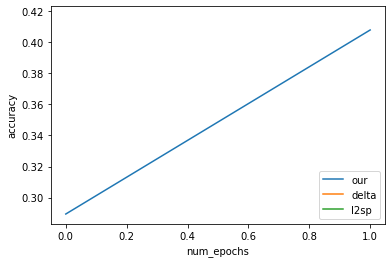

In [19]:
plt.plot(history['acc']['val_bal'],label = "our")
plt.plot(np.arange(len(balanced_delta)),balanced_delta, label ='delta')
plt.plot(np.arange(len(balanced_L2SP)),balanced_L2SP,label='l2sp')
plt.ylabel('accuracy')
plt.xlabel('num_epochs')
plt.legend()
plt.show()
    

In [22]:
history['acc']['val_bal']

[0.28955472165513135, 0.40769118234989454]